---
title: "11-简单线性回归"
subtitle: "Simple Linear Regression"
author: "Simon Zhou"
date: "2025-05-07"
format: 
    html:
        code-fold: false
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 2
---

In [1]:
import stata_setup
stata_setup.config('C:/Program Files/Stata18', 'mp', splash=False)

## 导入数据

In [2]:
%%stata
sysuse auto.dta,clear

(1978 automobile data)


## 线性回归的假设

- 假设1:y是连续变量
- 假设2:x可以被定义为连续变量（也可以是哑变量）
- 假设3:y和x之间存在线性关系
- 假设4:具有相互独立的观测值
- 假设5:不存在显著的outlier
- 假设6:等方差性
- 假设7:residual近似正态分布

总结而言：**线性、独立、正态、方差齐**

### 假设3:y和x之间存在线性关系

通过 `scatter plot` 或 `Lowess plot` 进行查看

**如果不符合线性关系怎么办？**

- `spline`：一次方项，分段fit直线
- `Quadratic`：二次方项
- `Cubic`：三次方项
- `Restricted cubic`：三次方项（头尾近乎直线）

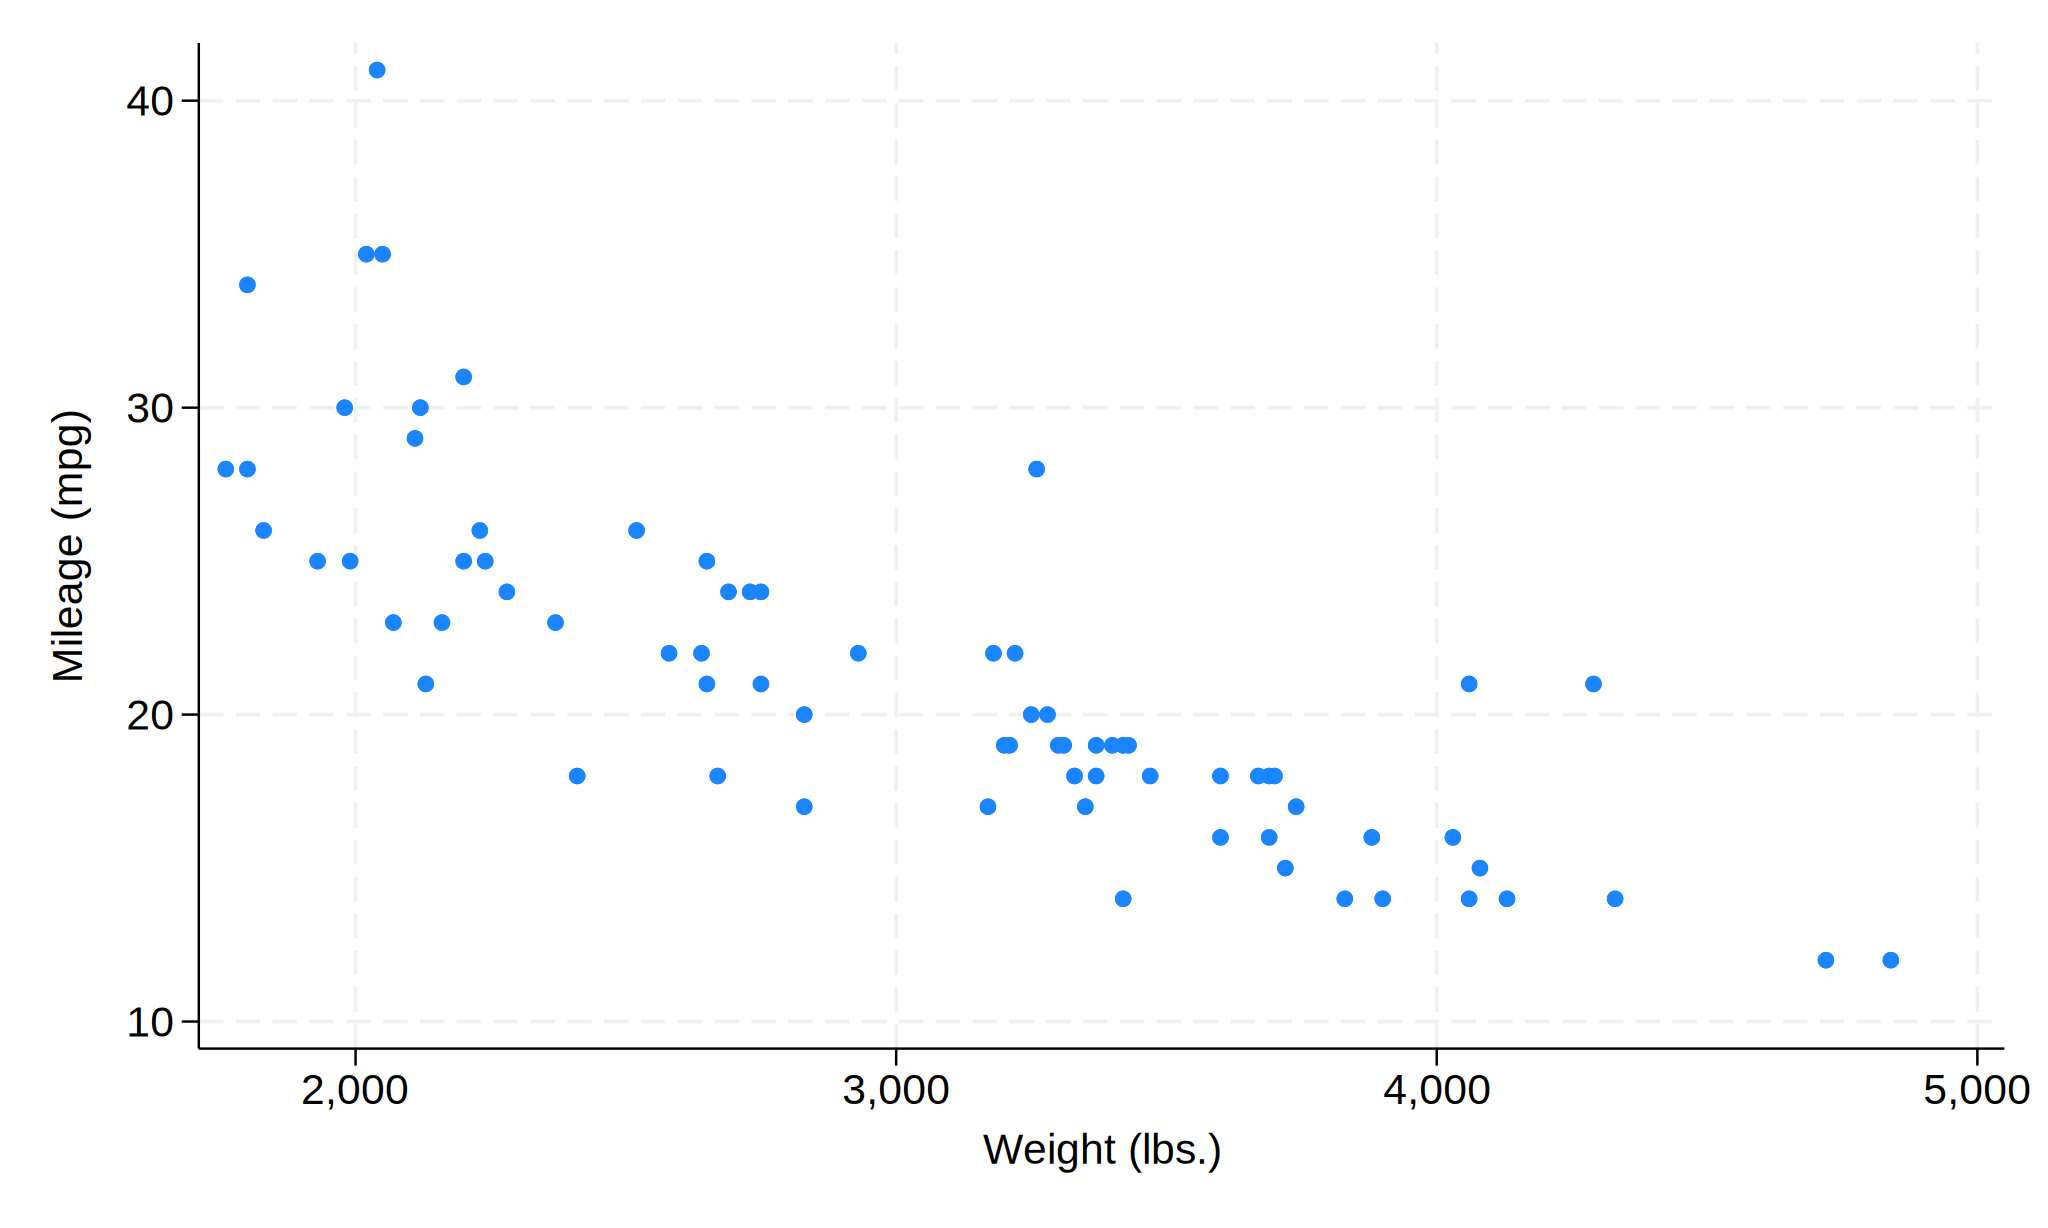

In [3]:
%%stata
twoway scatter mpg weight

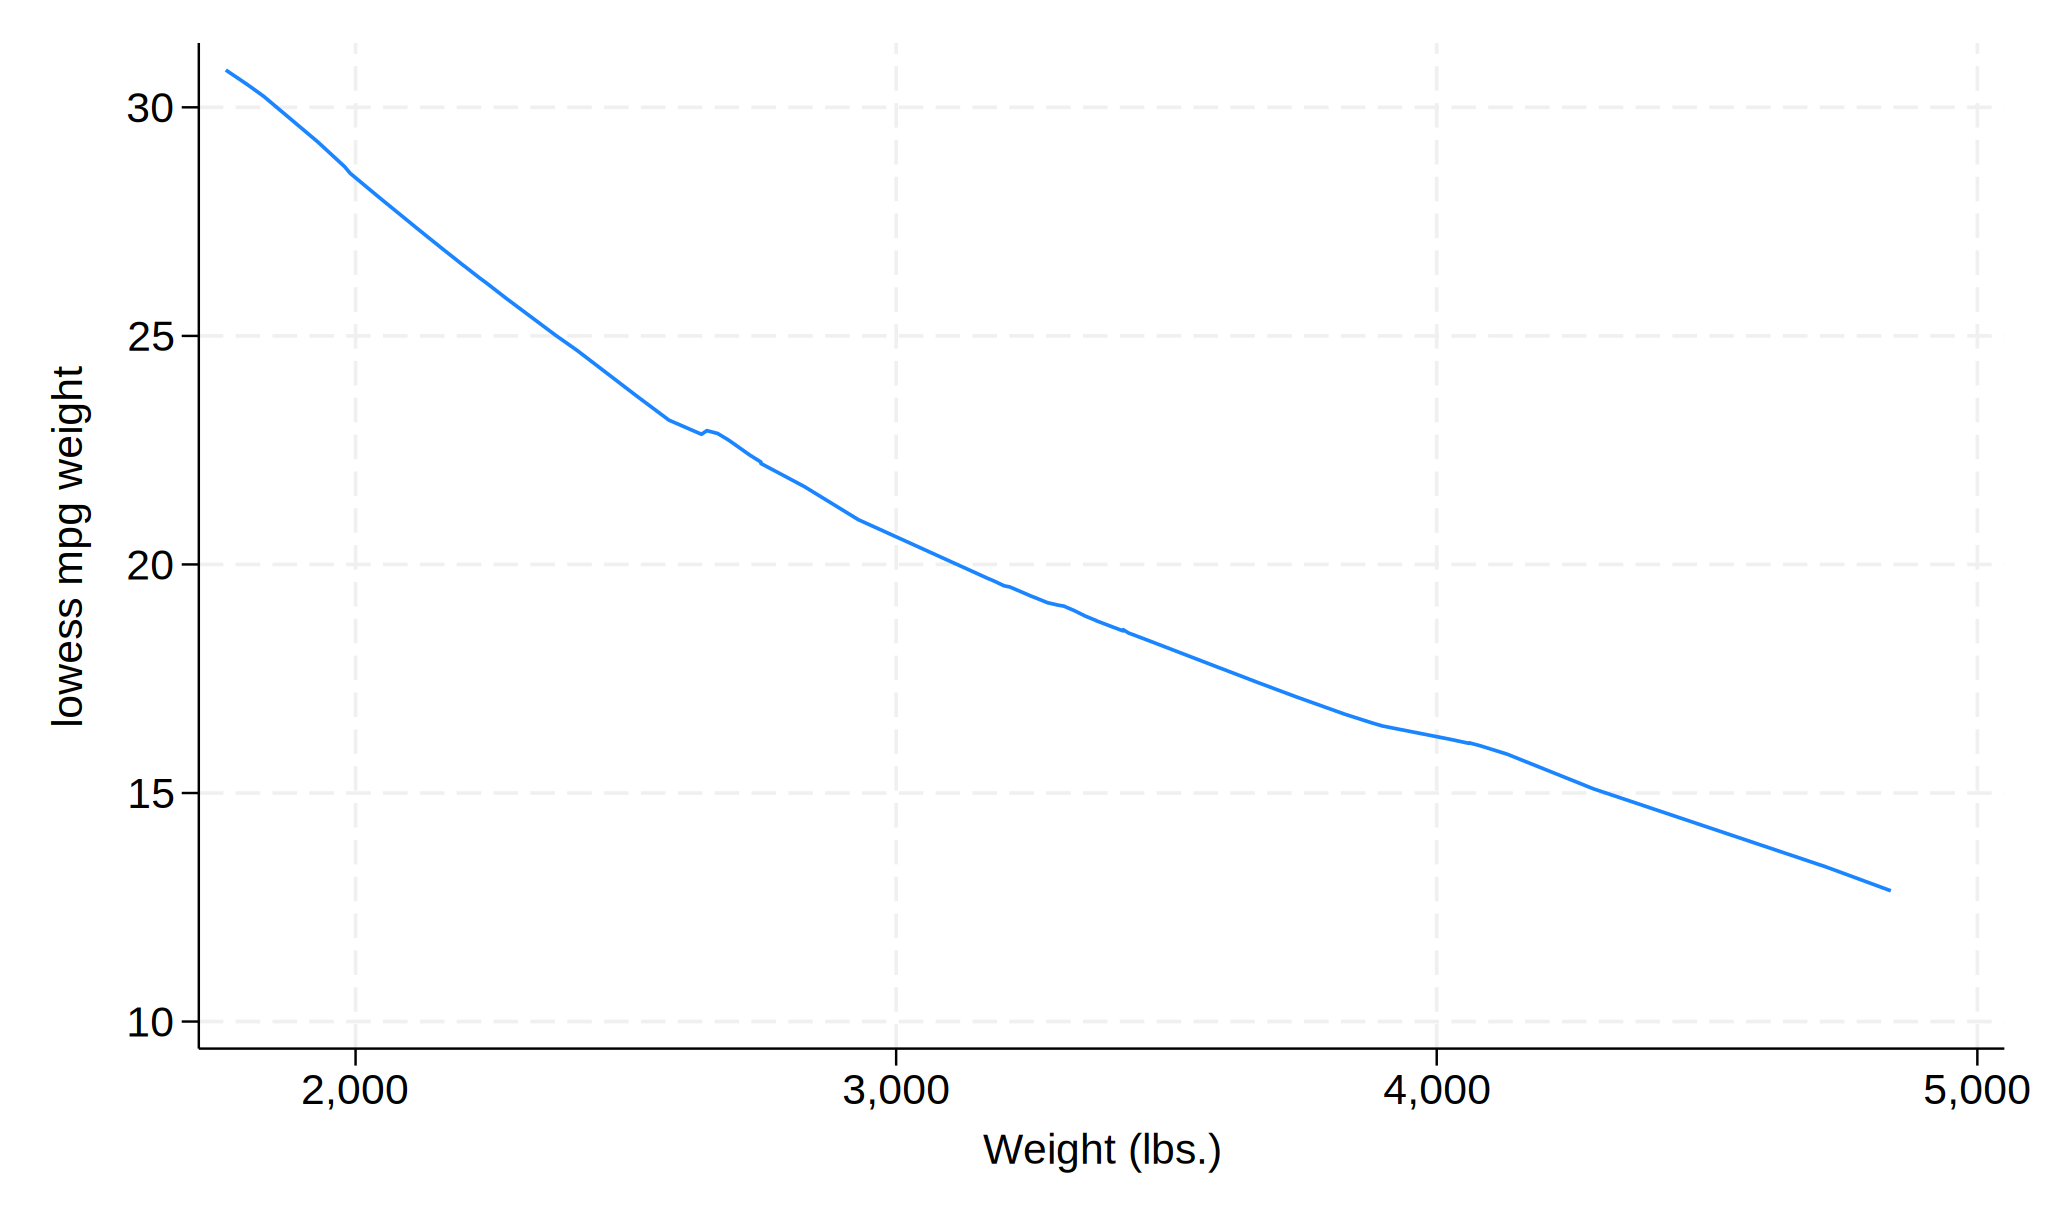

In [5]:
%%stata
twoway lowess mpg weight

**scatter plot和lowess plot输出在一起**

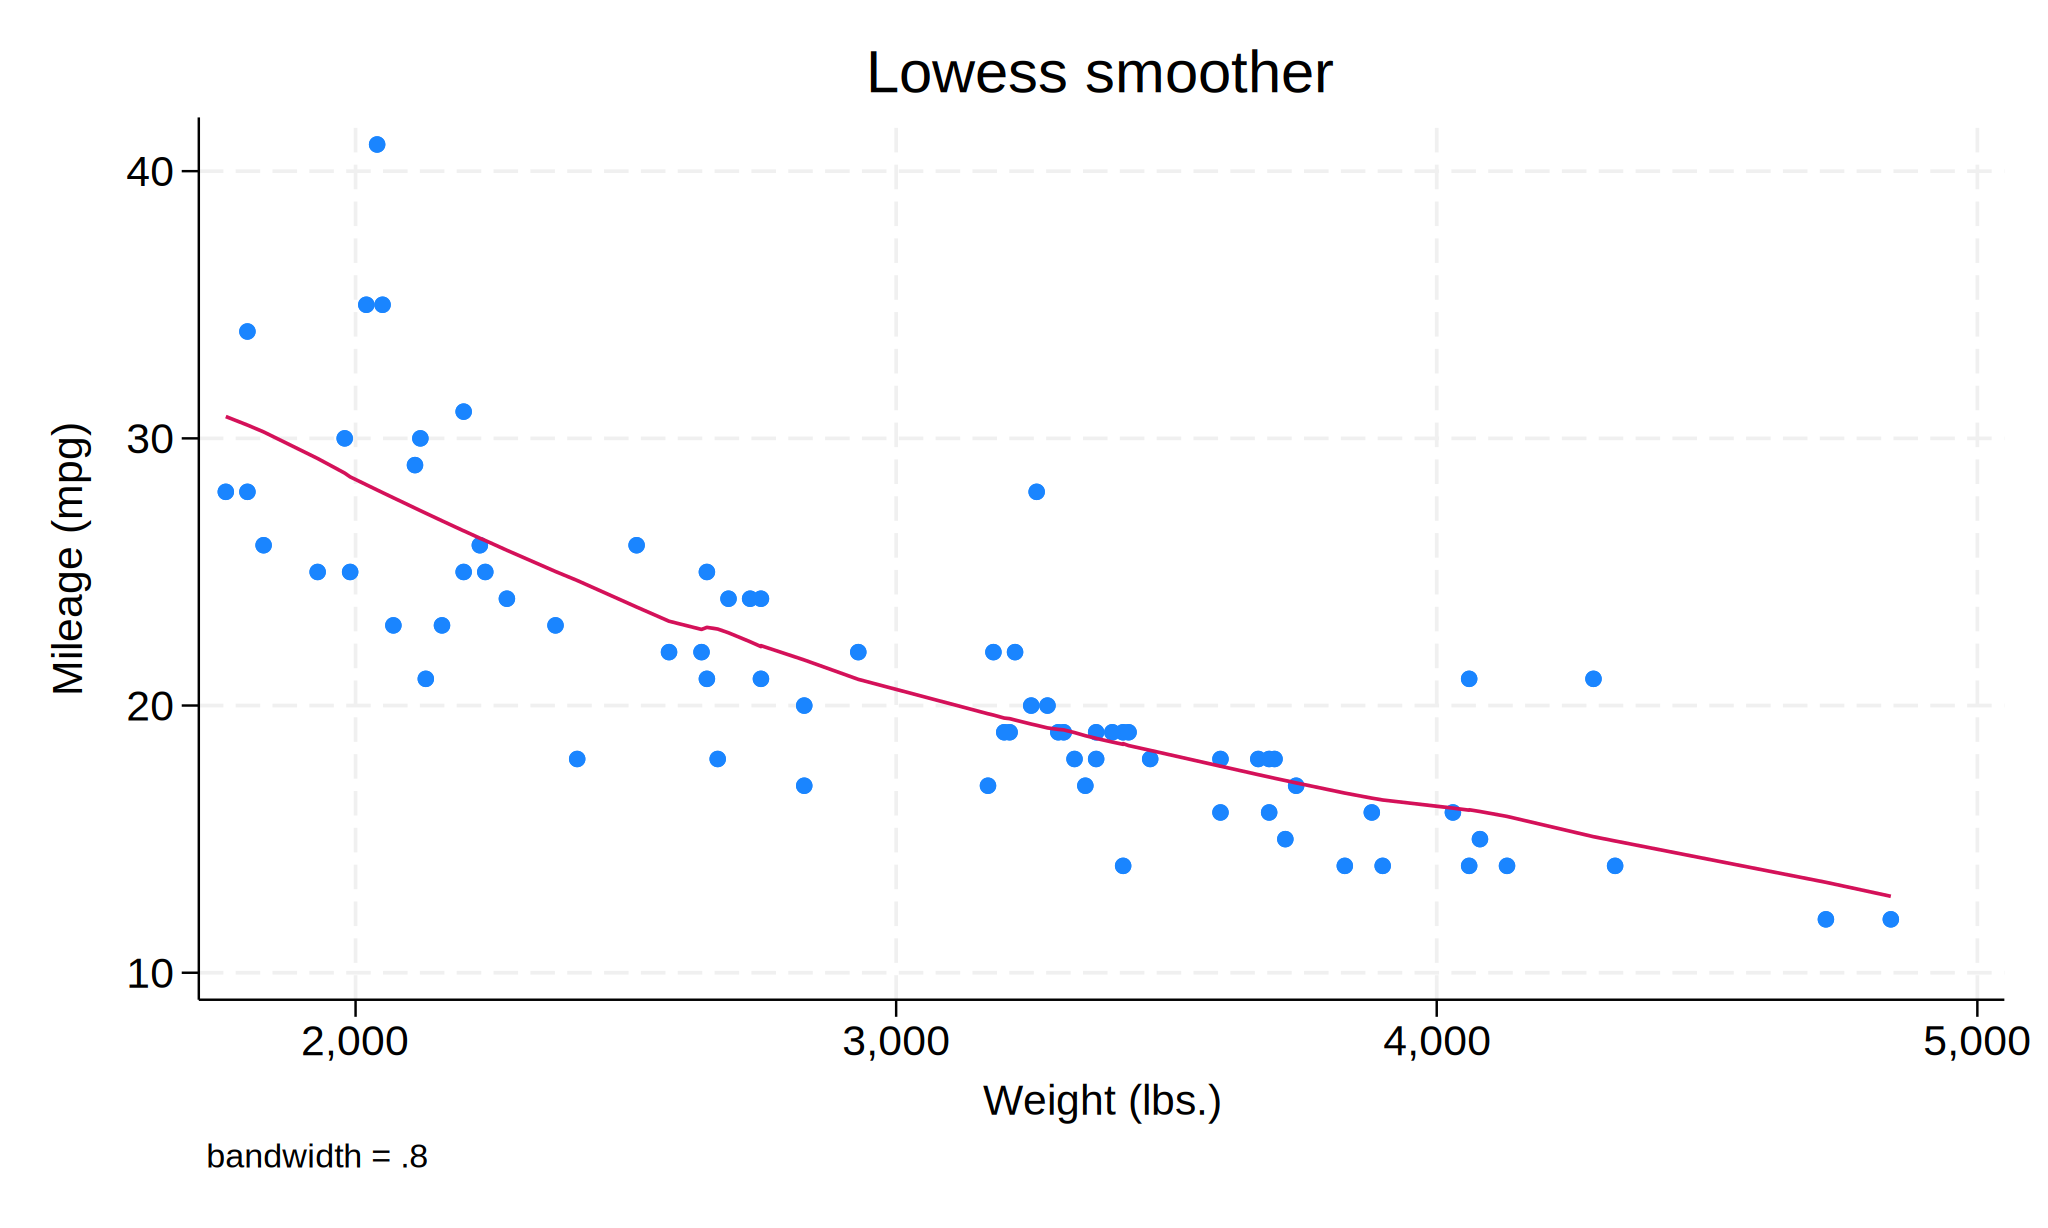

In [6]:
%%stata
lowess mpg weight

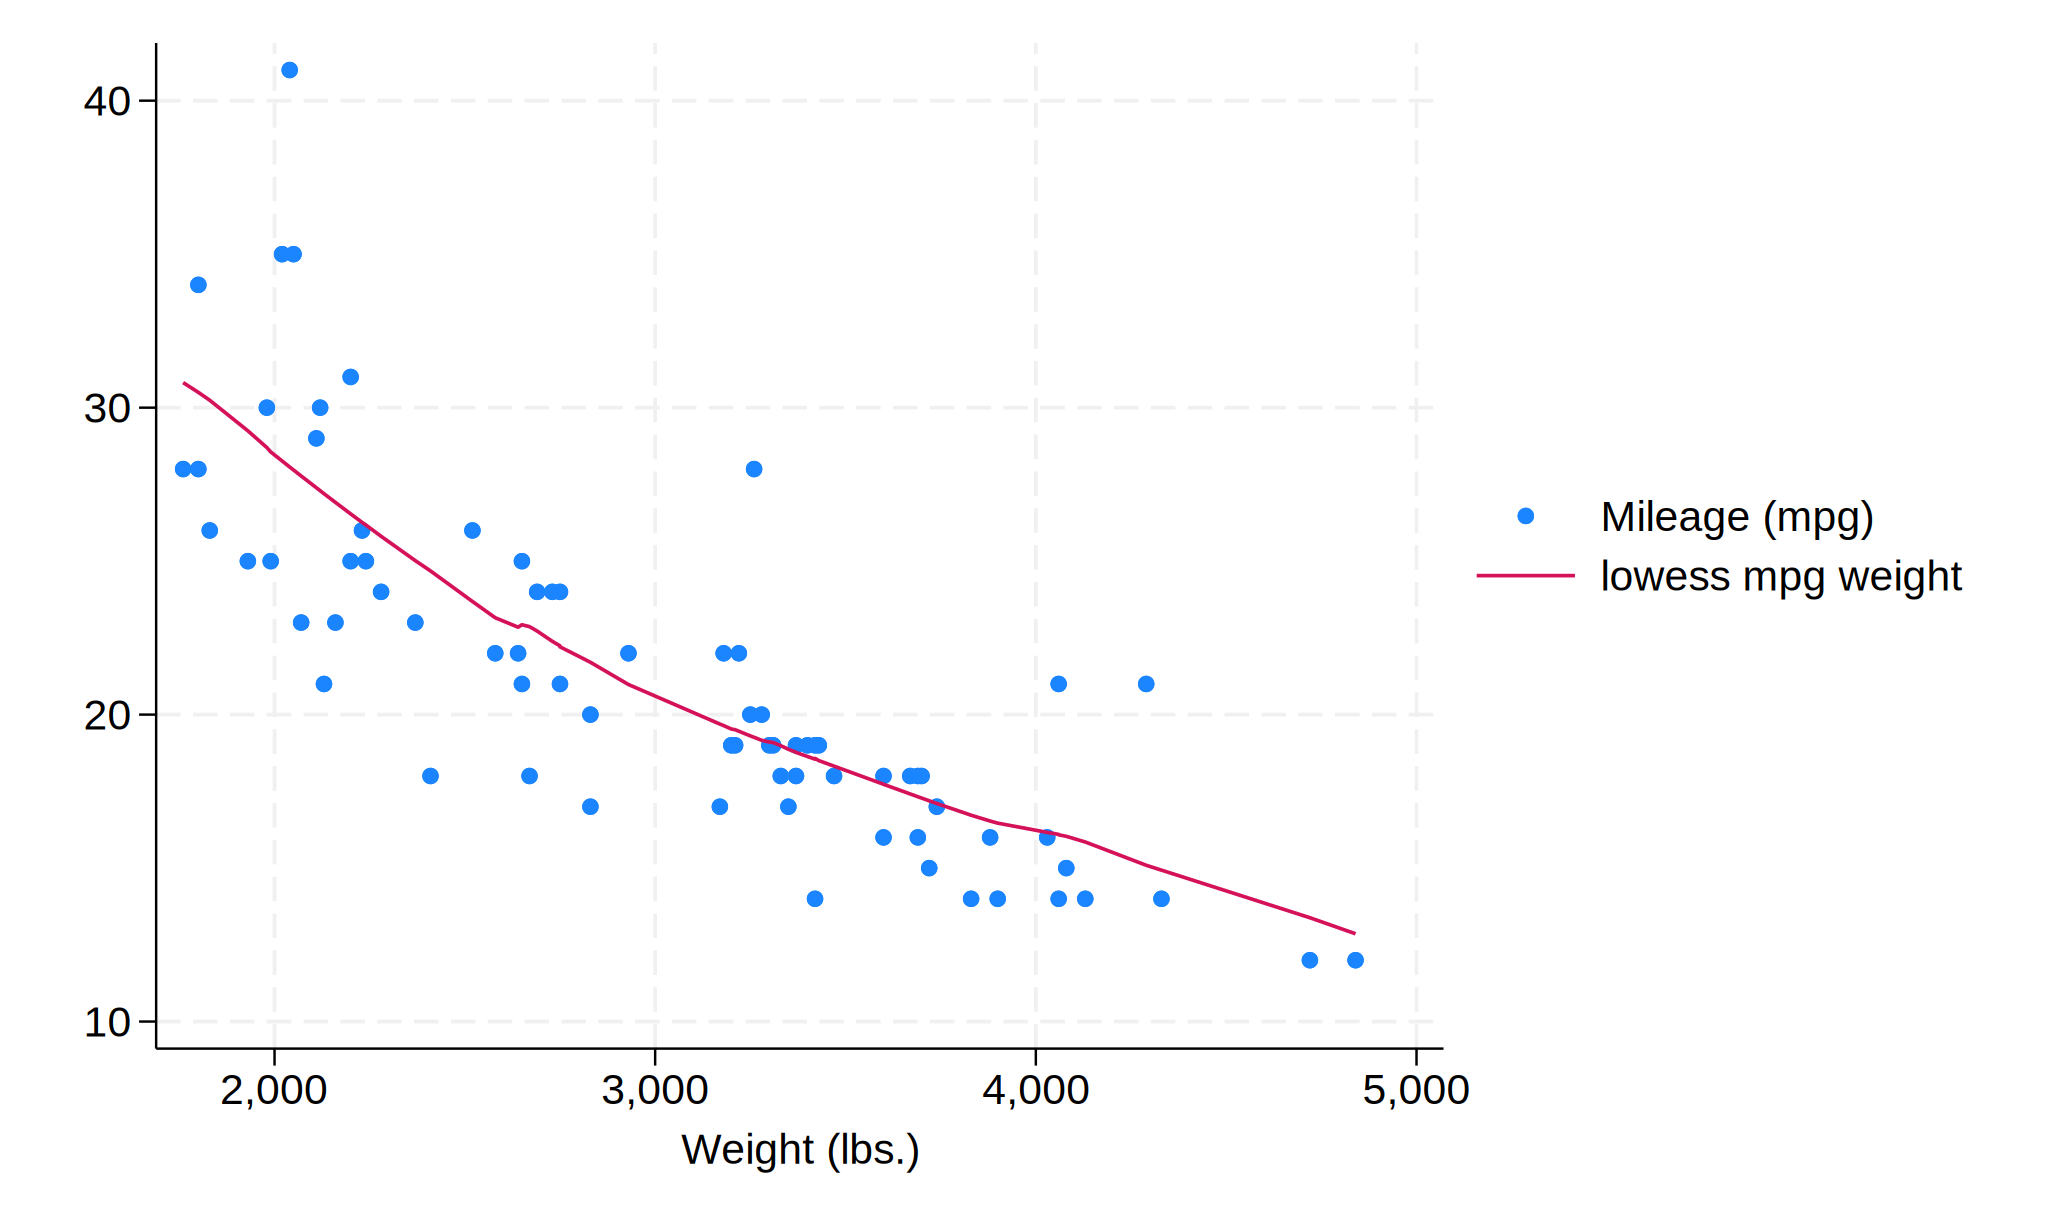

In [7]:
%%stata
twoway (scatter mpg weight)(lowess mpg weight)

### 假设4:具有相互独立的观测值

- 可以使用杜宾-瓦特森(Durbin-Watson)统计量
- Stata对于非time series数据不设有这个统计量的检测
- 更多情况下，不需要测量这个假设是否成立
- 如果是相互关联的观测值：GEE模型、Multi-level模型

### 假设5:不存在显著的outlier

- `Boxplot` 或 `Violin Plot`

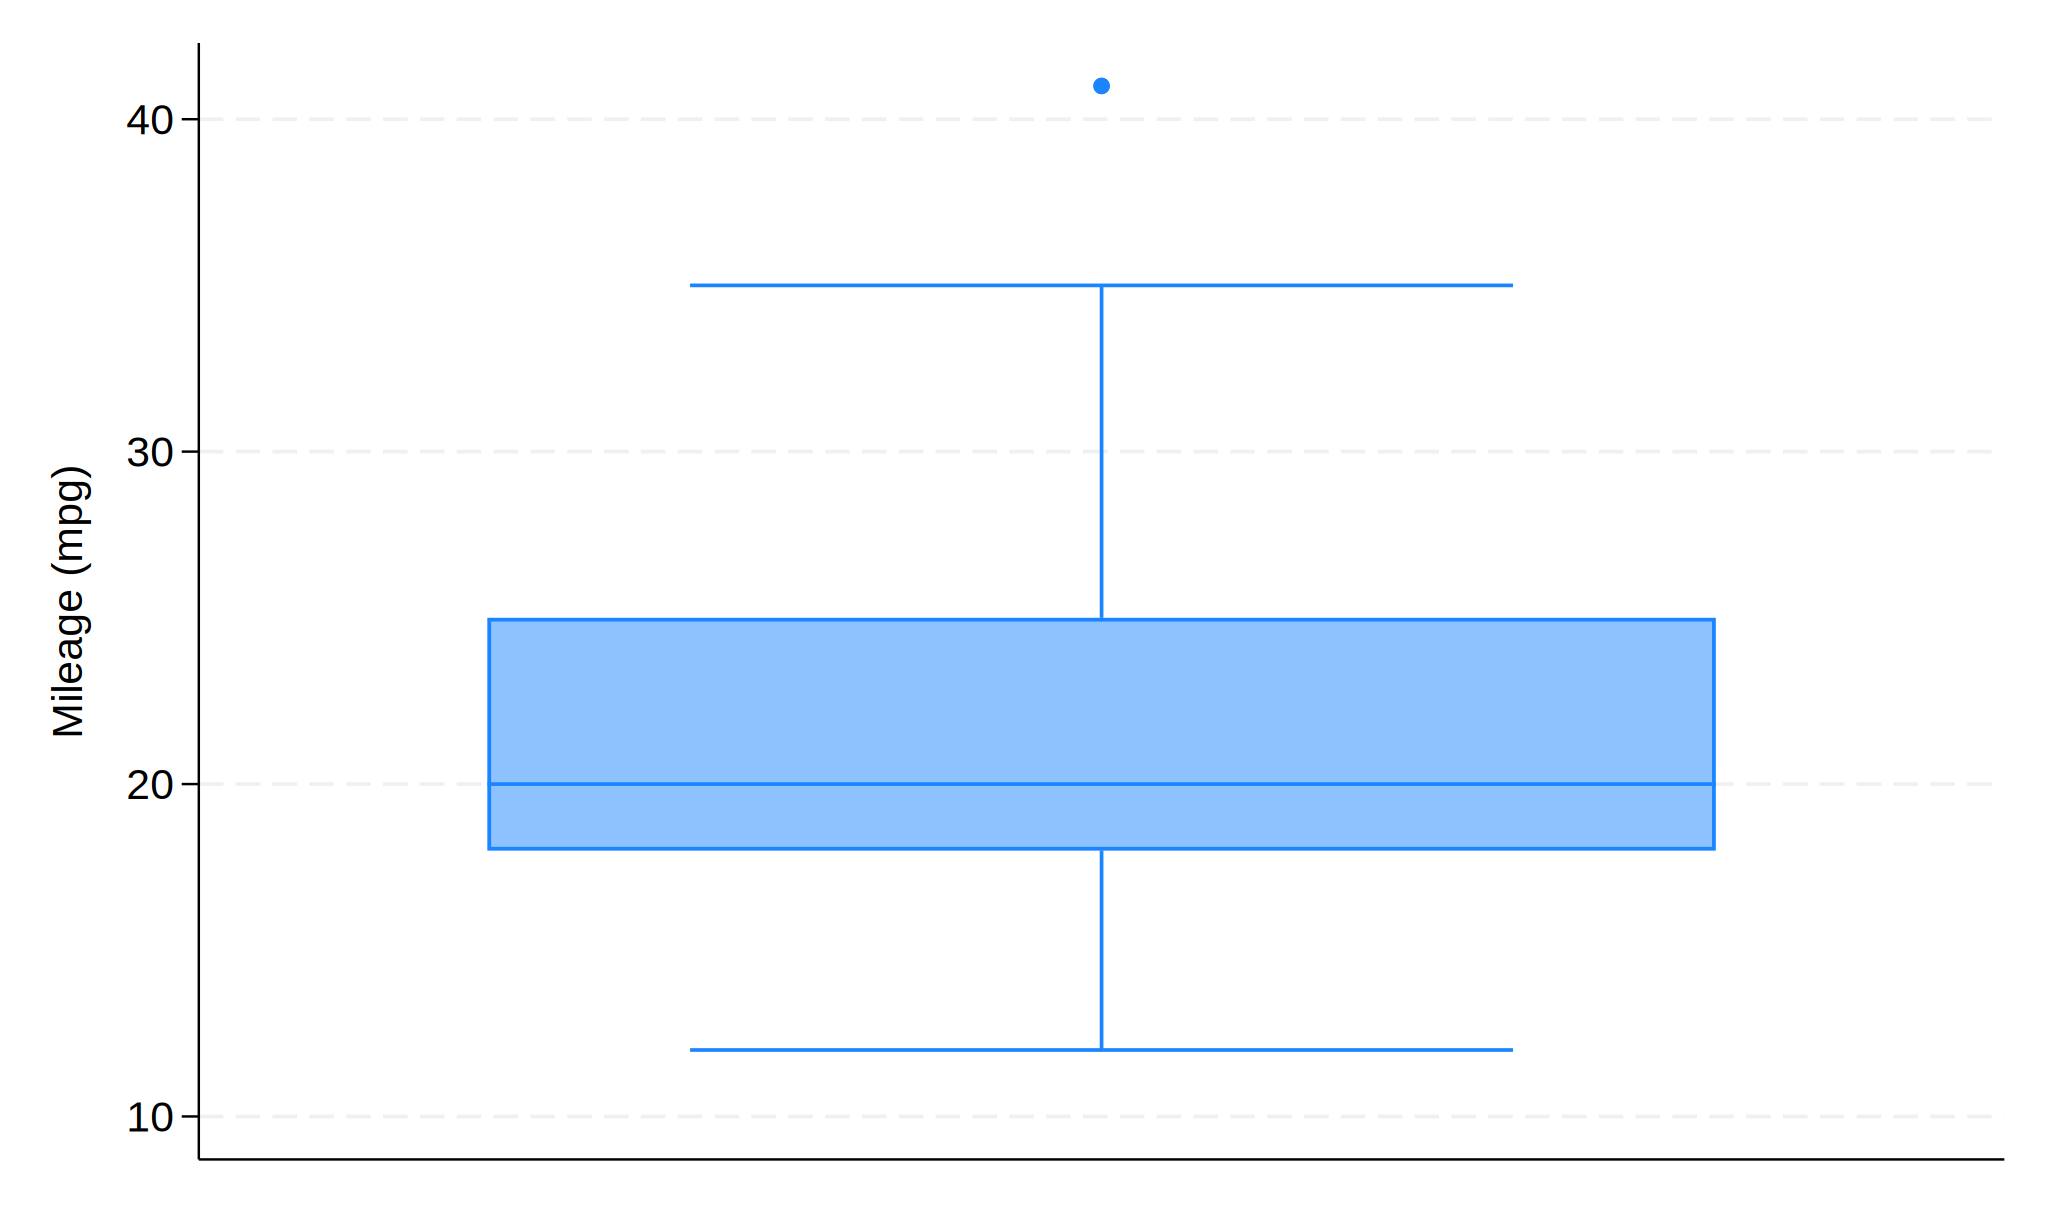

In [8]:
%%stata
graph box mpg

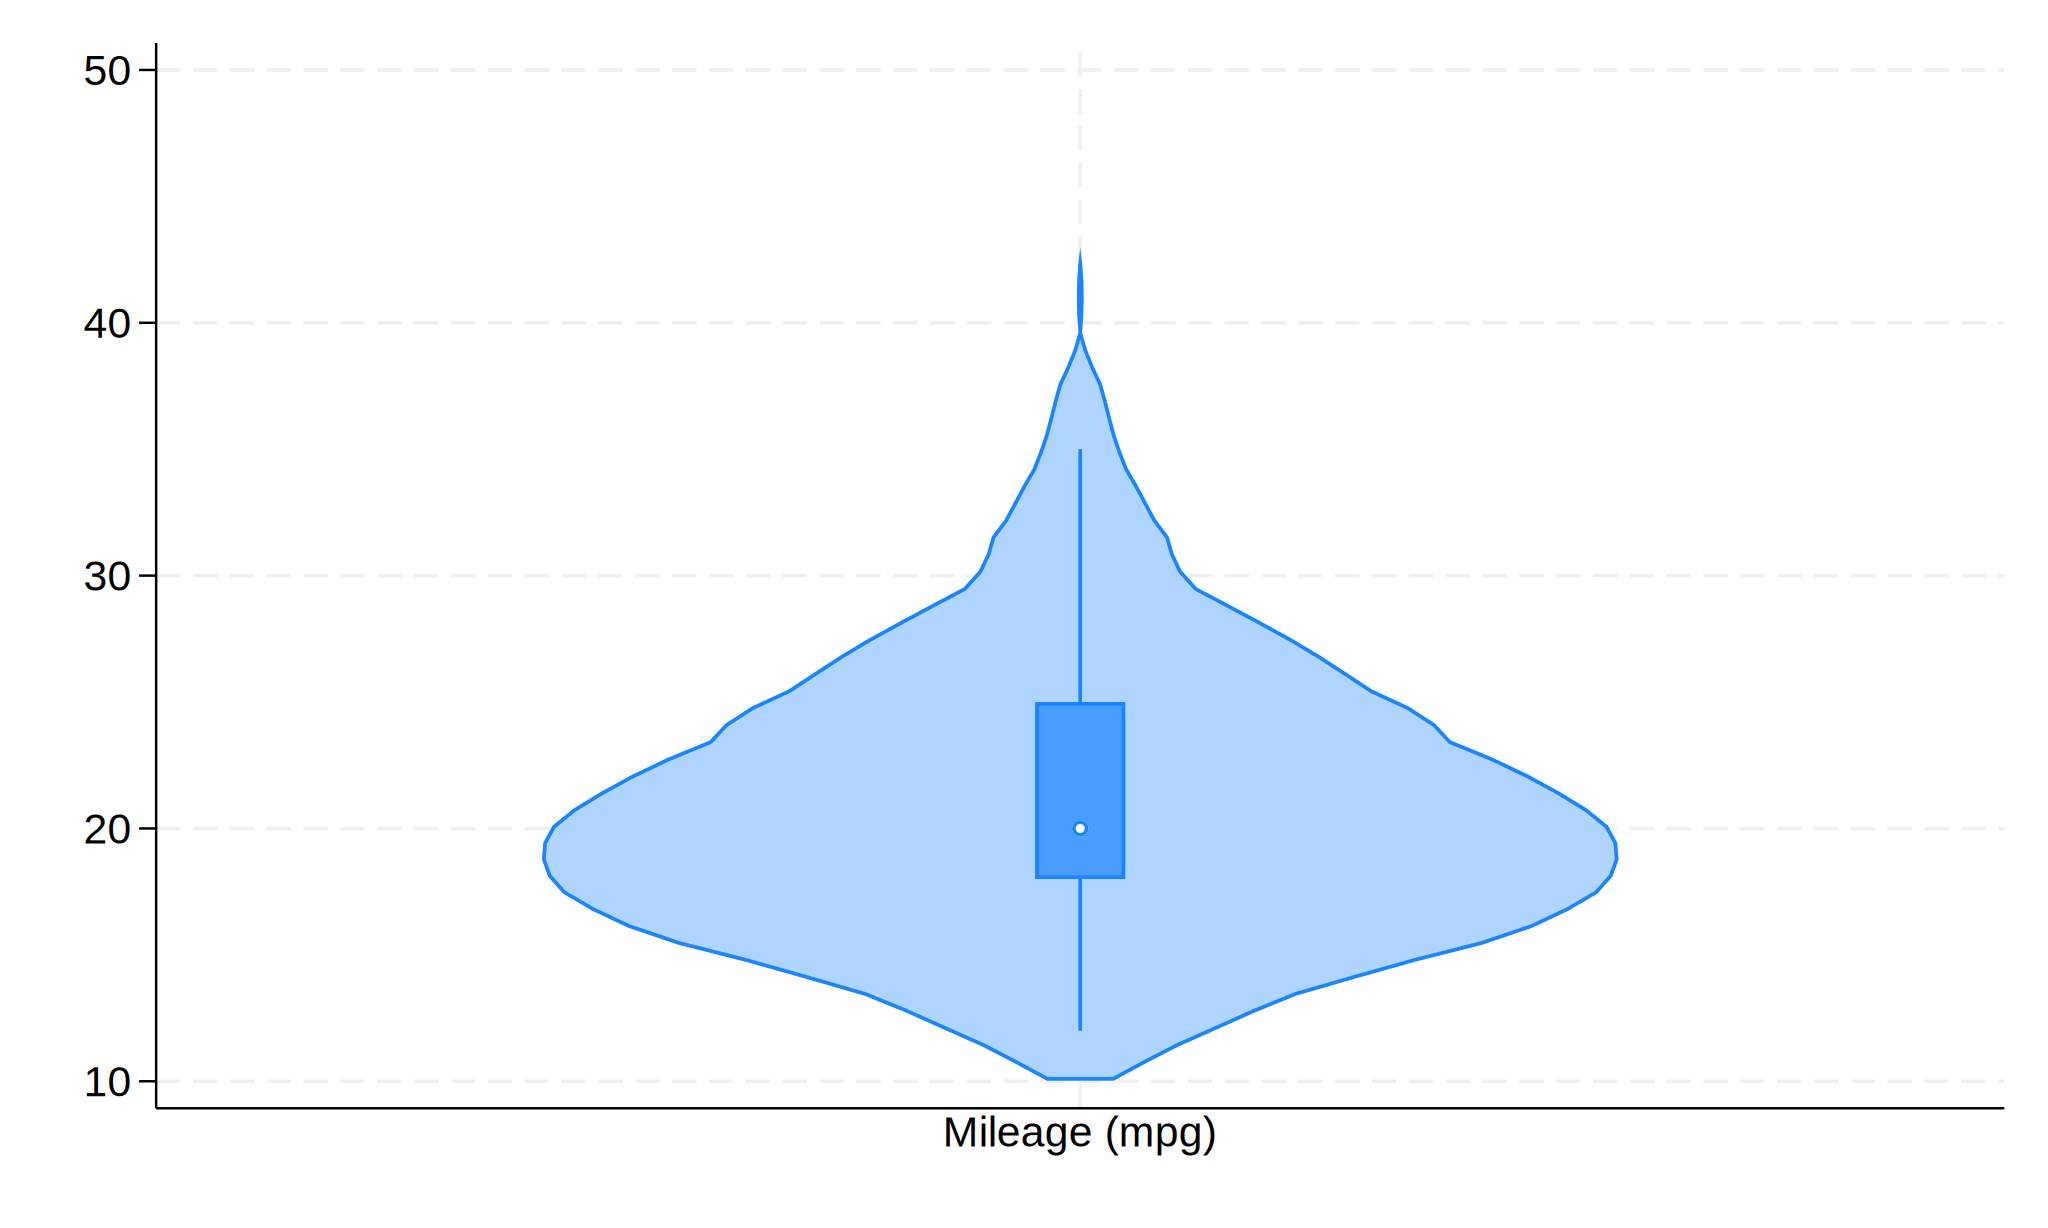

In [9]:
%%stata
vioplot mpg

### 假设6:等方差性

- 使用 Residual-versus-fitted plot
- 代码:`rvfplot`

做等方差之前需要做回归的分析，分析及结果如下：

In [10]:
%%stata
reg mpg weight


      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(1, 72)        =    134.62
       Model |   1591.9902         1   1591.9902   Prob > F        =    0.0000
    Residual |  851.469256        72  11.8259619   R-squared       =    0.6515
-------------+----------------------------------   Adj R-squared   =    0.6467
       Total |  2443.45946        73  33.4720474   Root MSE        =    3.4389

------------------------------------------------------------------------------
         mpg | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      weight |  -.0060087   .0005179   -11.60   0.000    -.0070411   -.0049763
       _cons |   39.44028   1.614003    24.44   0.000     36.22283    42.65774
------------------------------------------------------------------------------


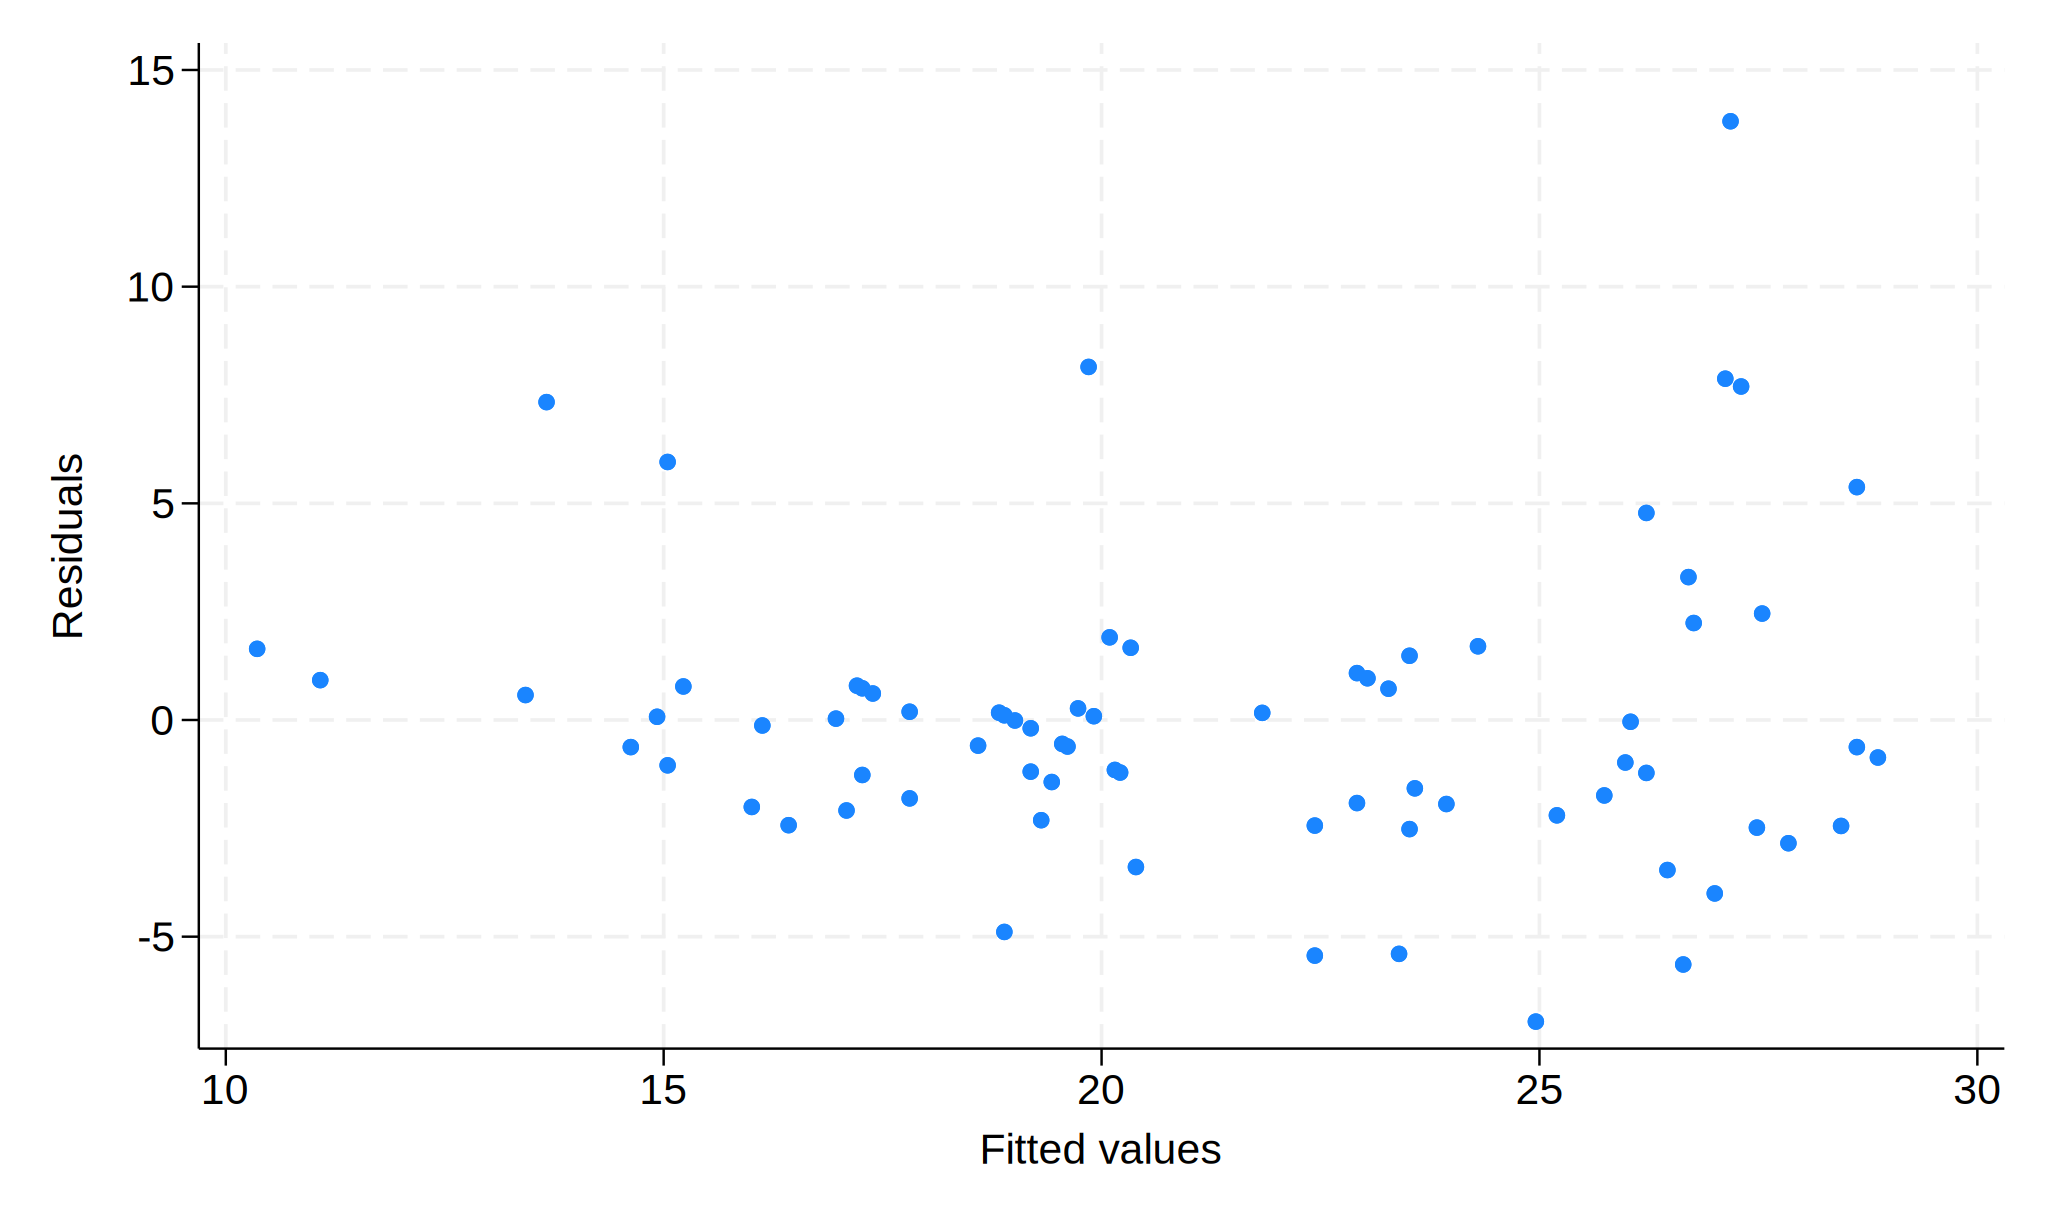

In [11]:
%%stata
rvfplot

从上图可以看出，并不是完全等方差，特别是在 `Fitted value` 在 `25-30` 区间内时

### 假设7:residual近似正态分布

1. Step 1:得到残差
2. Step 2:使用正态分布的检验方法
    - 直方图
    - 使用 `qq plot` 观测
    - 偏度峰度、Shapiro-Wilk检验、Shapiro-Francia检验

先建立一个 `resid` 变量：

In [12]:
%%stata
predict resid,residual

再对 `resid` 变量进行查看和检验

下面分别是 直方图 和 Q-Q图

(bin=8, start=-6.9593482, width=2.5970982)


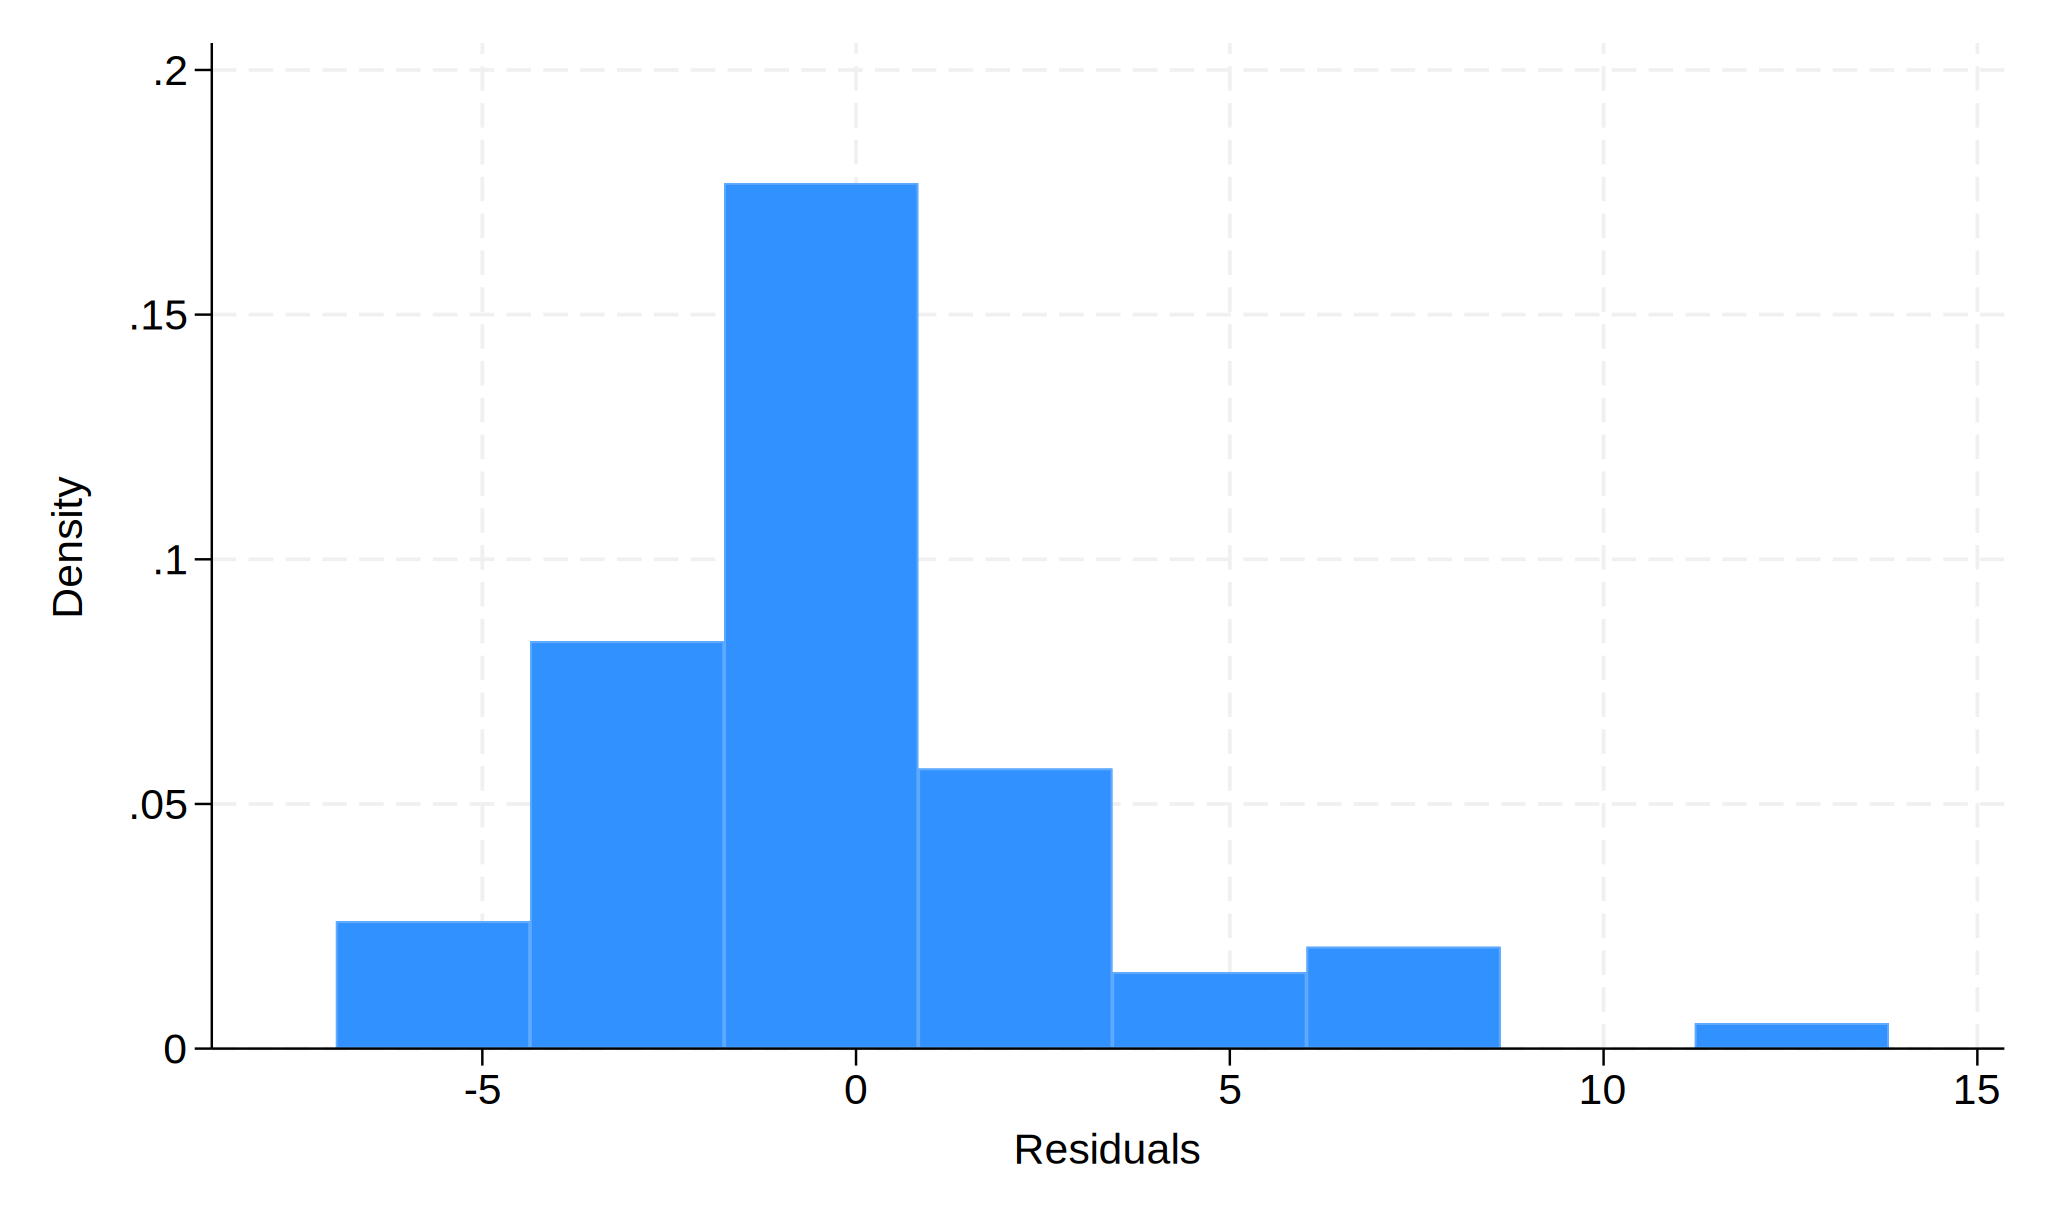

In [13]:
%%stata
hist resid


. //qq plot
. qnorm resid

. 


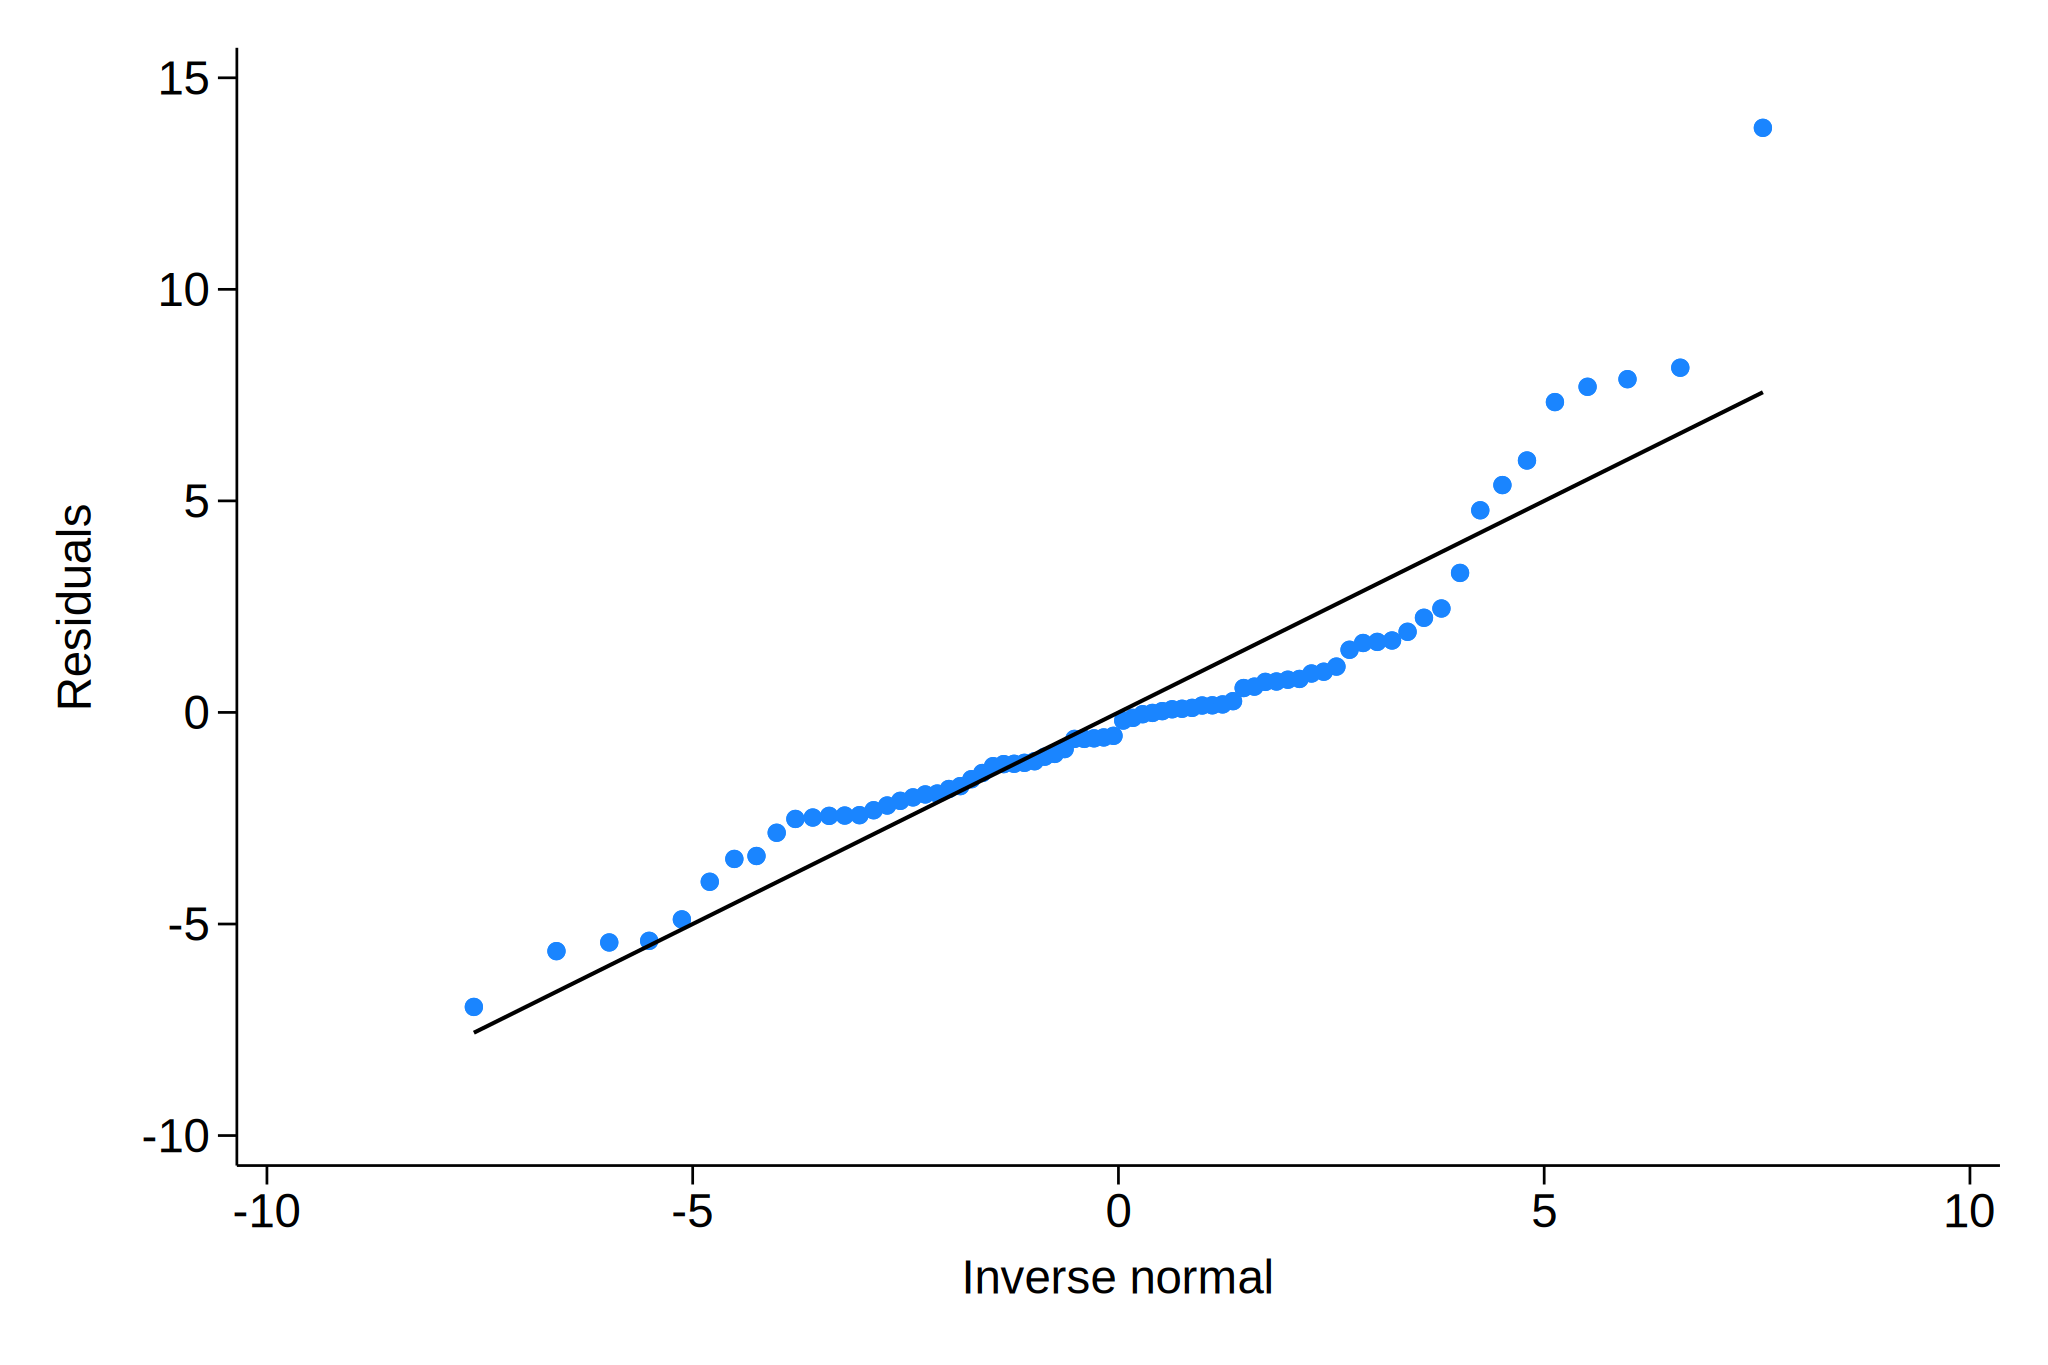

In [14]:
%%stata
//qq plot
qnorm resid

### 对残差使用偏度、峰度进行检验

In [15]:
%%stata
sktest resid


Skewness and kurtosis tests for normality
                                                         ----- Joint test -----
    Variable |       Obs   Pr(skewness)   Pr(kurtosis)   Adj chi2(2)  Prob>chi2
-------------+-----------------------------------------------------------------
       resid |        74         0.0000         0.0010         20.82     0.0000


### 使用 Shapiro-Wilk 检验

In [16]:
%%stata
swilk resid


                   Shapiro–Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
       resid |         74    0.89593      6.702     4.150    0.00002


## 简单线性回归

### 语法

```stata
regress depvar [indepvars] [if] [in] [weight] [,option]
```

具体参见：[regress — Linear regression](https://www.stata.com/manuals13/rregress.pdf)